In [1]:
import nltk

In [ ]:
nltk.download_shell()

In [ ]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
messages

In [ ]:
for mess_no,message in enumerate(messages):
    print(mess_no,message)

In [ ]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection',sep = '\t',names = ['label','message'])
messages.head(10)

In [ ]:
messages.describe()

In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [7]:
messages['Length'] = messages['message'].apply(len)
plt.figure(figsize=(12,6))
messages['Length'].plot.hist(bins=100)

NameError: name 'plt' is not defined

In [27]:
messages[messages['Length']==messages['Length'].max()].iloc[0]

label                                                    ham
message    For me the love should start with attraction.i...
Length                                                   910
Name: 1085, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B31CAE2D30>,
      dtype=object)

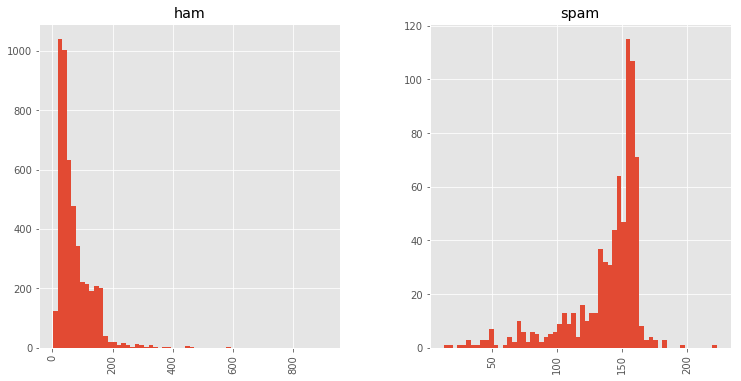

In [32]:

messages.hist(column = 'Length',by = 'label',bins = 60,figsize=(12,6))

In [8]:
import string

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
mess = 'Notice: After this i am going to be stronger!'
messli = [i for i in mess if i not in string.punctuation]
messli

['N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'A',
 'f',
 't',
 'e',
 'r',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 ' ',
 'a',
 'm',
 ' ',
 'g',
 'o',
 'i',
 'n',
 'g',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 's',
 't',
 'r',
 'o',
 'n',
 'g',
 'e',
 'r']

In [11]:
from nltk.corpus import stopwords

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
mesli = ''.join(messli)

In [55]:
' '.join([i for i in mesli.split() if i  not in stopwords.words('english')])

'Notice After going stronger'

In [15]:
def mess_process(mess):
    mess = [i for i in mess if i not in string.punctuation]
    mess = ''.join(mess)
    mess = [i for i in mess.split() if i not in stopwords.words('english')]
    return mess

In [16]:
messages['message'].head(5).apply(mess_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
bow_transformer = CountVectorizer(analyzer=mess_process).fit(messages['message'])

In [19]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [20]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [74]:
bow_transformer.get_feature_names()[9746]

'say'

In [22]:
message_bow = bow_transformer.transform(messages['message'])

In [78]:
print(message_bow.shape)

(5572, 11617)


In [85]:
sparsity = 100*(message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1]))
sparsity

0.08655038742205227

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(message_bow)
tfidf4 = tfidf.transform(bow4)
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [26]:
tfidf.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [29]:
messages_tfidf = tfidf.transform(message_bow)